<a href="https://colab.research.google.com/github/shinnocoderepo/AI_Learning_pub/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Required Imports

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url='https://raw.githubusercontent.com/shinnocoderepo/AI_Learning_pub/main/diabetes_data_upload.csv'
df=pd.read_csv(url)

In [3]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [19]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()


In [23]:
nd=df.apply(le.fit_transform)

In [24]:
nd.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [11]:
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline

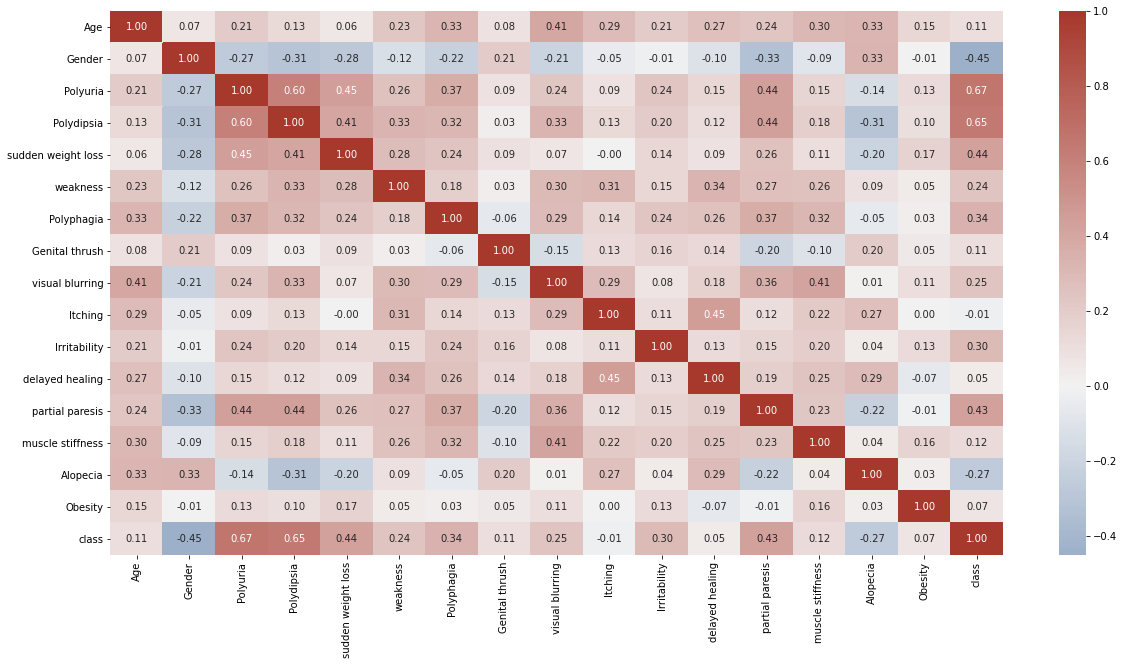

In [31]:
plt.figure(figsize=(20,10)) 
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True)
sns.heatmap(nd.corr(),center=0,cmap=cmap,annot=True,fmt='.2f')


In [32]:
def corelated_columns(data, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = data.corr().abs()
    
    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Subset the matrix
    reduced_matrix = matrix.mask(mask)
    
    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if \
              any(reduced_matrix[c] > threshold)]
    
    return to_drop

In [33]:
corelated_columns(nd,.75)

[]

In [34]:
corelated_columns(nd,.50)

['Polyuria', 'Polydipsia']

In [35]:
#Datasets Looks good with Less Corelations. Hence no feature columns can be drop from dataset.